Data Sclicing


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Data 살펴보기
x(sagittal), y(coronal), z(axial)
1. dmri
- x : (3,75) --> 1/2: 39
- y : (6,86) --> 1/2: 46
- z : (0,64) --> 1/2: 32
2. fmri
- x : (12,106) --> 1/2: 59
- y : (14,133) --> 1/2: 73
- z : (7,105) --> 1/2: 56

In [9]:
dmri_file = '/root/default/capstone/HCP_YA_2mm/data/100206.src.gz.gqi.1.7.fib.gz.dti_fa.nii.gz'
d_img = nib.load(dmri_file)
print(d_img.shape)

(78, 94, 68)


In [ ]:
d_data = d_img.get_fdata()
fig, axes = plt.subplots(ncols=8, nrows=10, figsize=(40, 50)) 
for i, ax in enumerate(axes.flatten()):
    if i >= 78:
        continue
    ax.imshow(d_data[i, :, :], cmap='gray', origin='lower')
    ax.axis('off')
    ax.set_title('i = %i' % i, fontsize=30)
fig.tight_layout()

In [4]:
mri_file = '/root/default/capstone/fib_1mm_fa_co-regist_target(sMRI)/100206_1mm_fa.nii'
img = nib.load(mri_file)
print(img.shape)

(121, 145, 121)


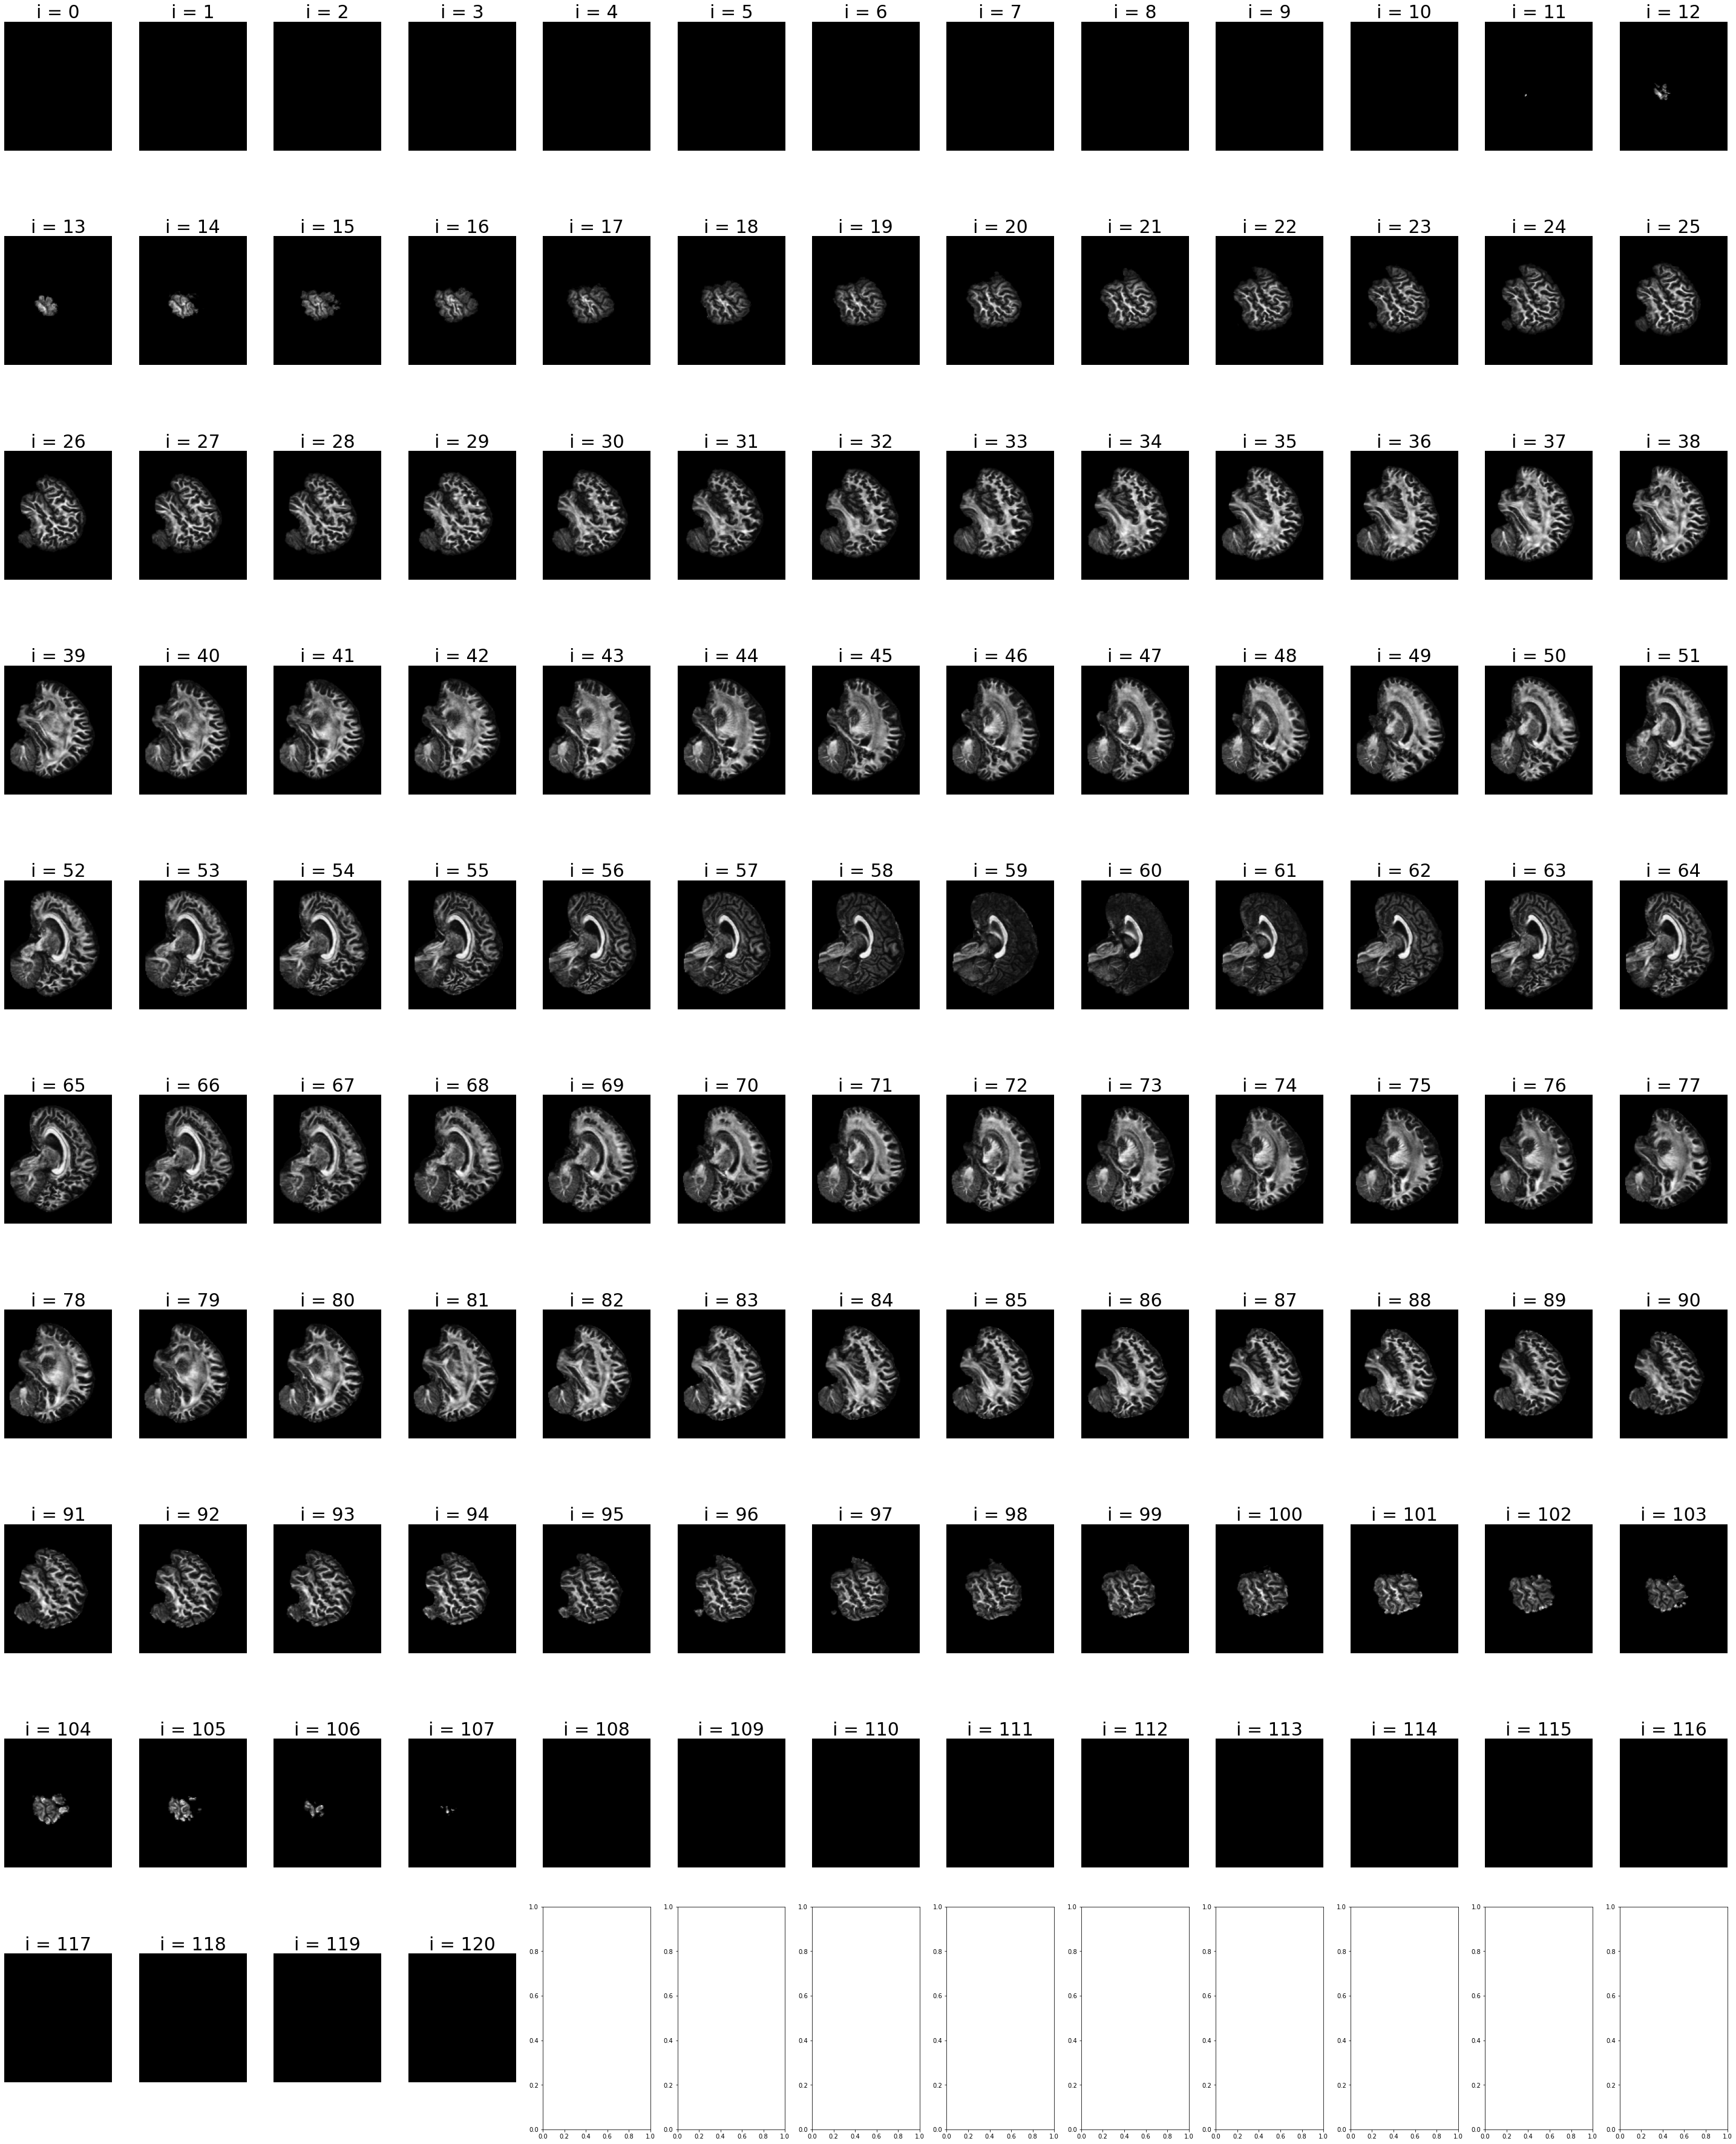

In [6]:
data = img.get_fdata()
fig, axes = plt.subplots(ncols=13, nrows=10, figsize=(40, 50)) 
for i, ax in enumerate(axes.flatten()):
    if i >= 121:
        continue
    ax.imshow(data[i, :, :], cmap='gray', origin='lower')
    ax.axis('off')
    ax.set_title('i = %i' % i, fontsize=30)
fig.tight_layout()

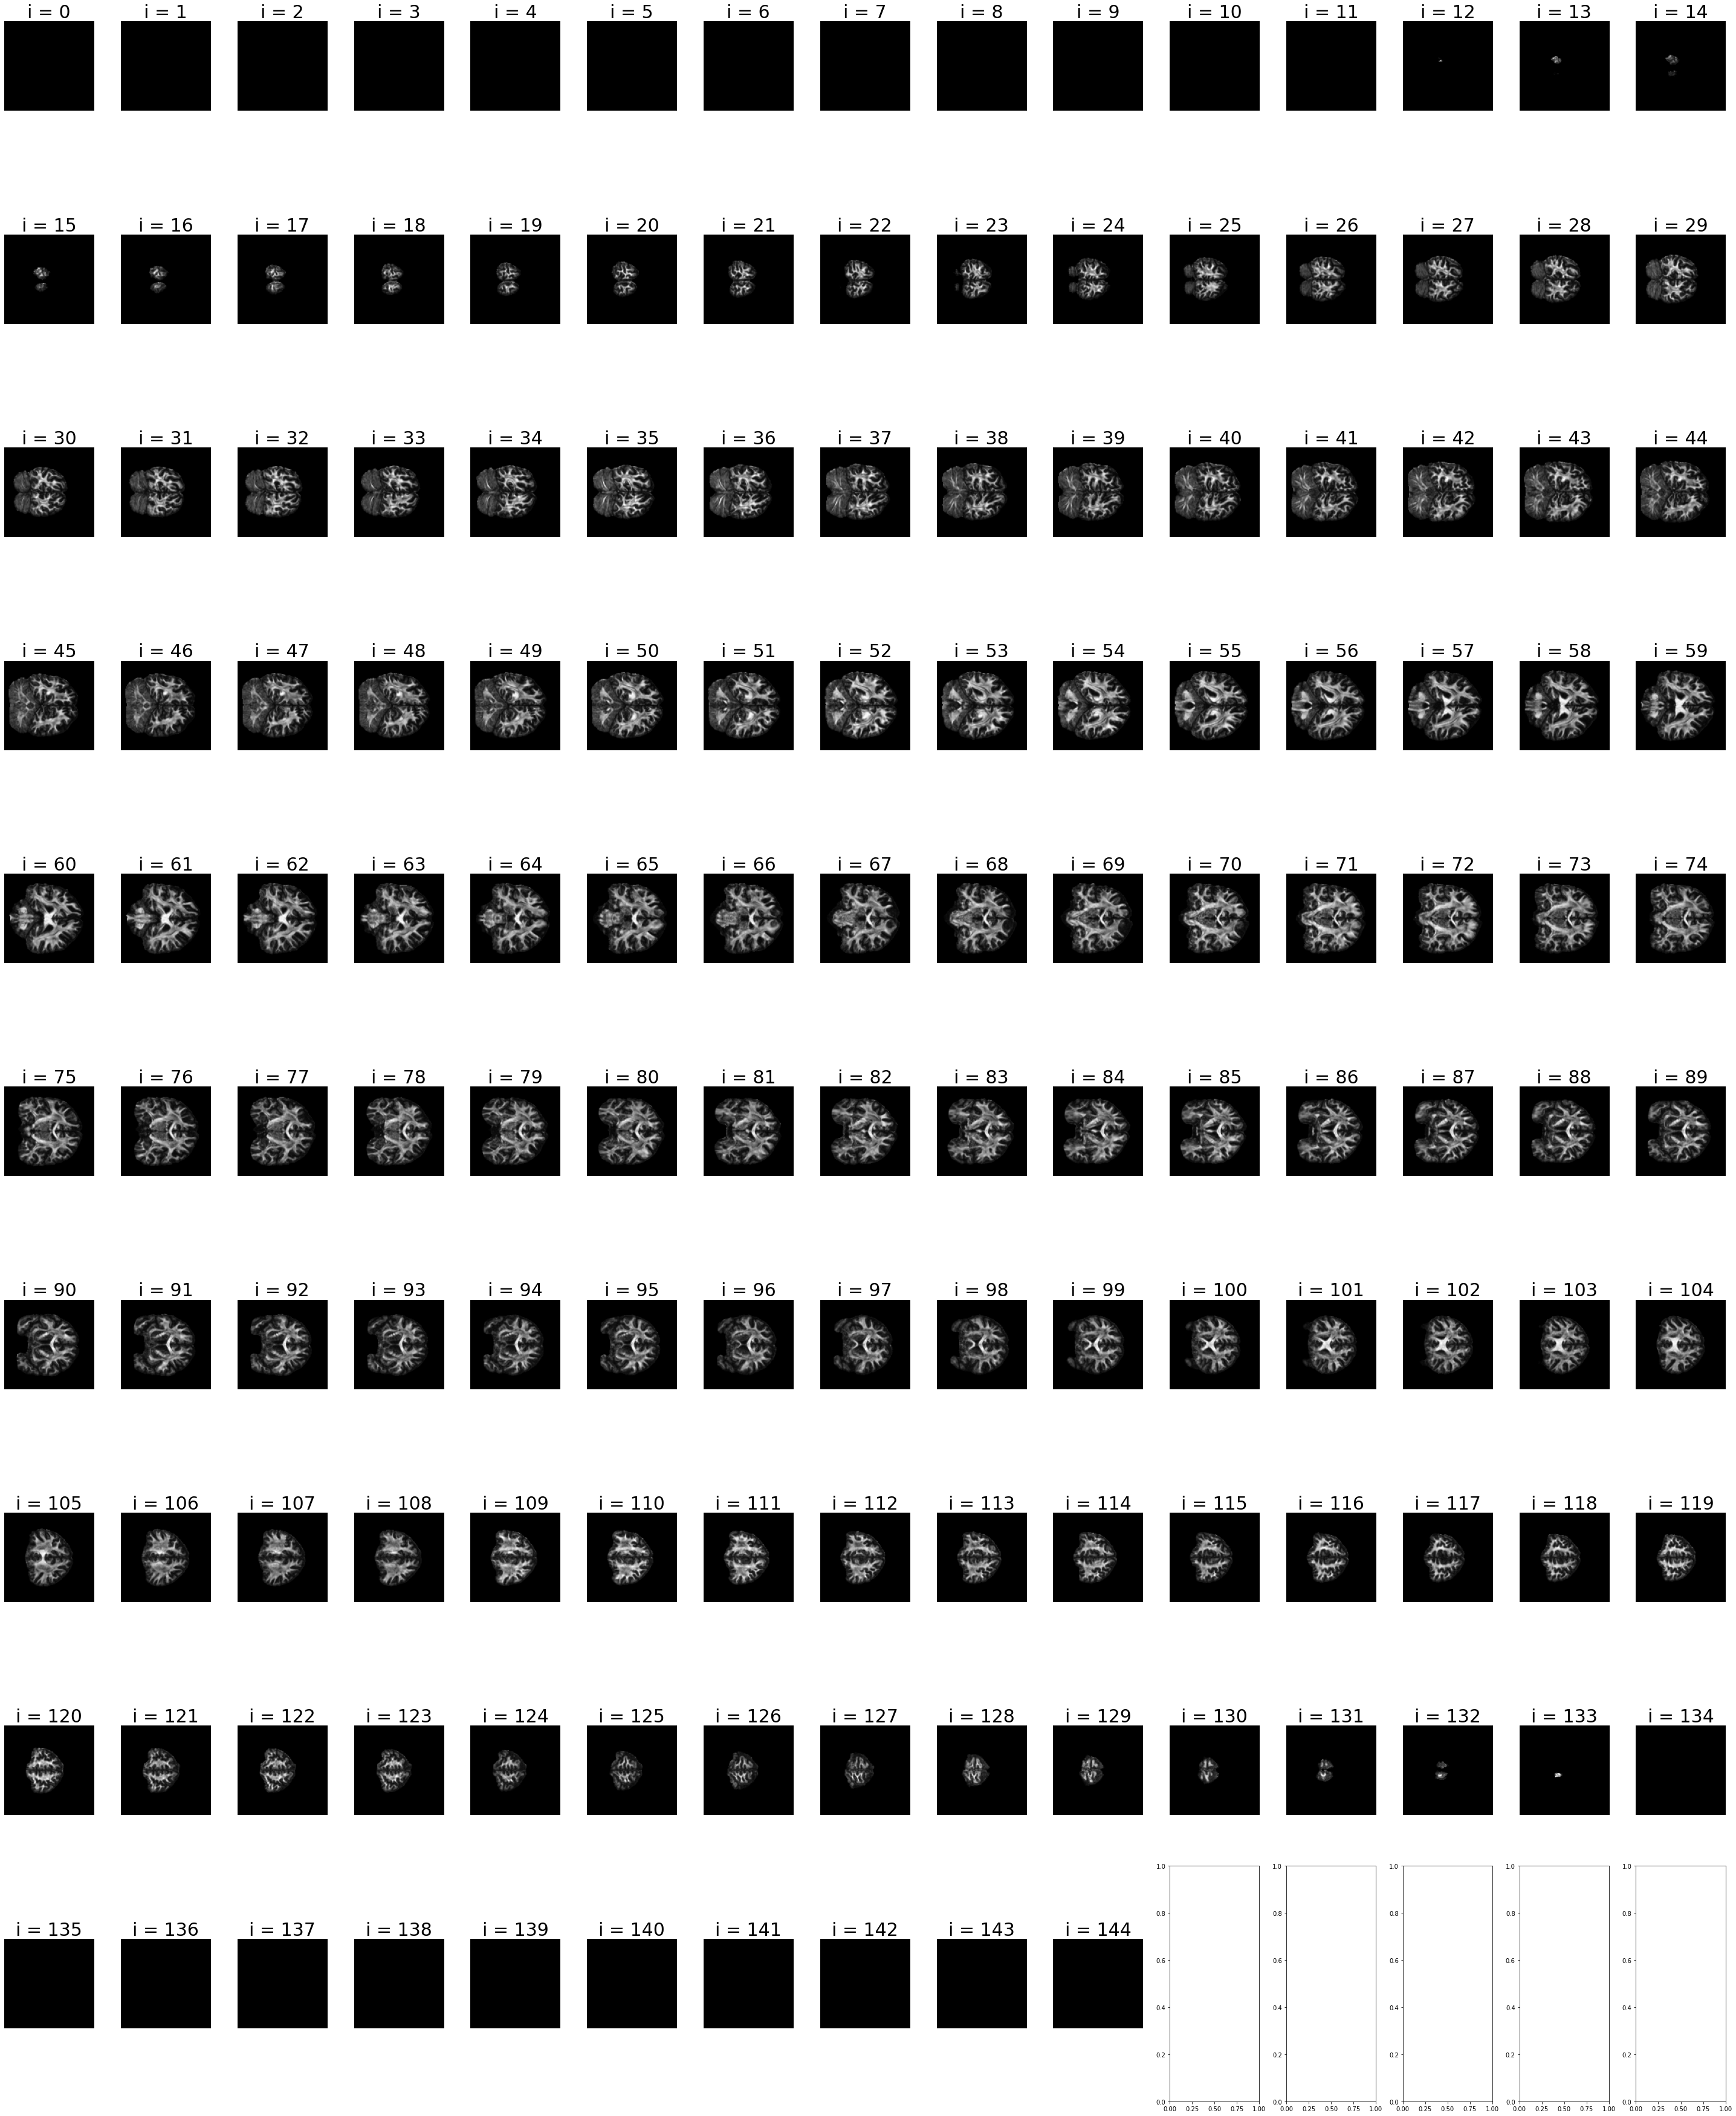

In [7]:
data = img.get_fdata()
fig, axes = plt.subplots(ncols=15, nrows=10, figsize=(40, 50)) 
for i, ax in enumerate(axes.flatten()):
    if i >= 145:
        continue
    ax.imshow(data[:, i, :], cmap='gray', origin='lower')
    ax.axis('off')
    ax.set_title('i = %i' % i, fontsize=30)
fig.tight_layout()

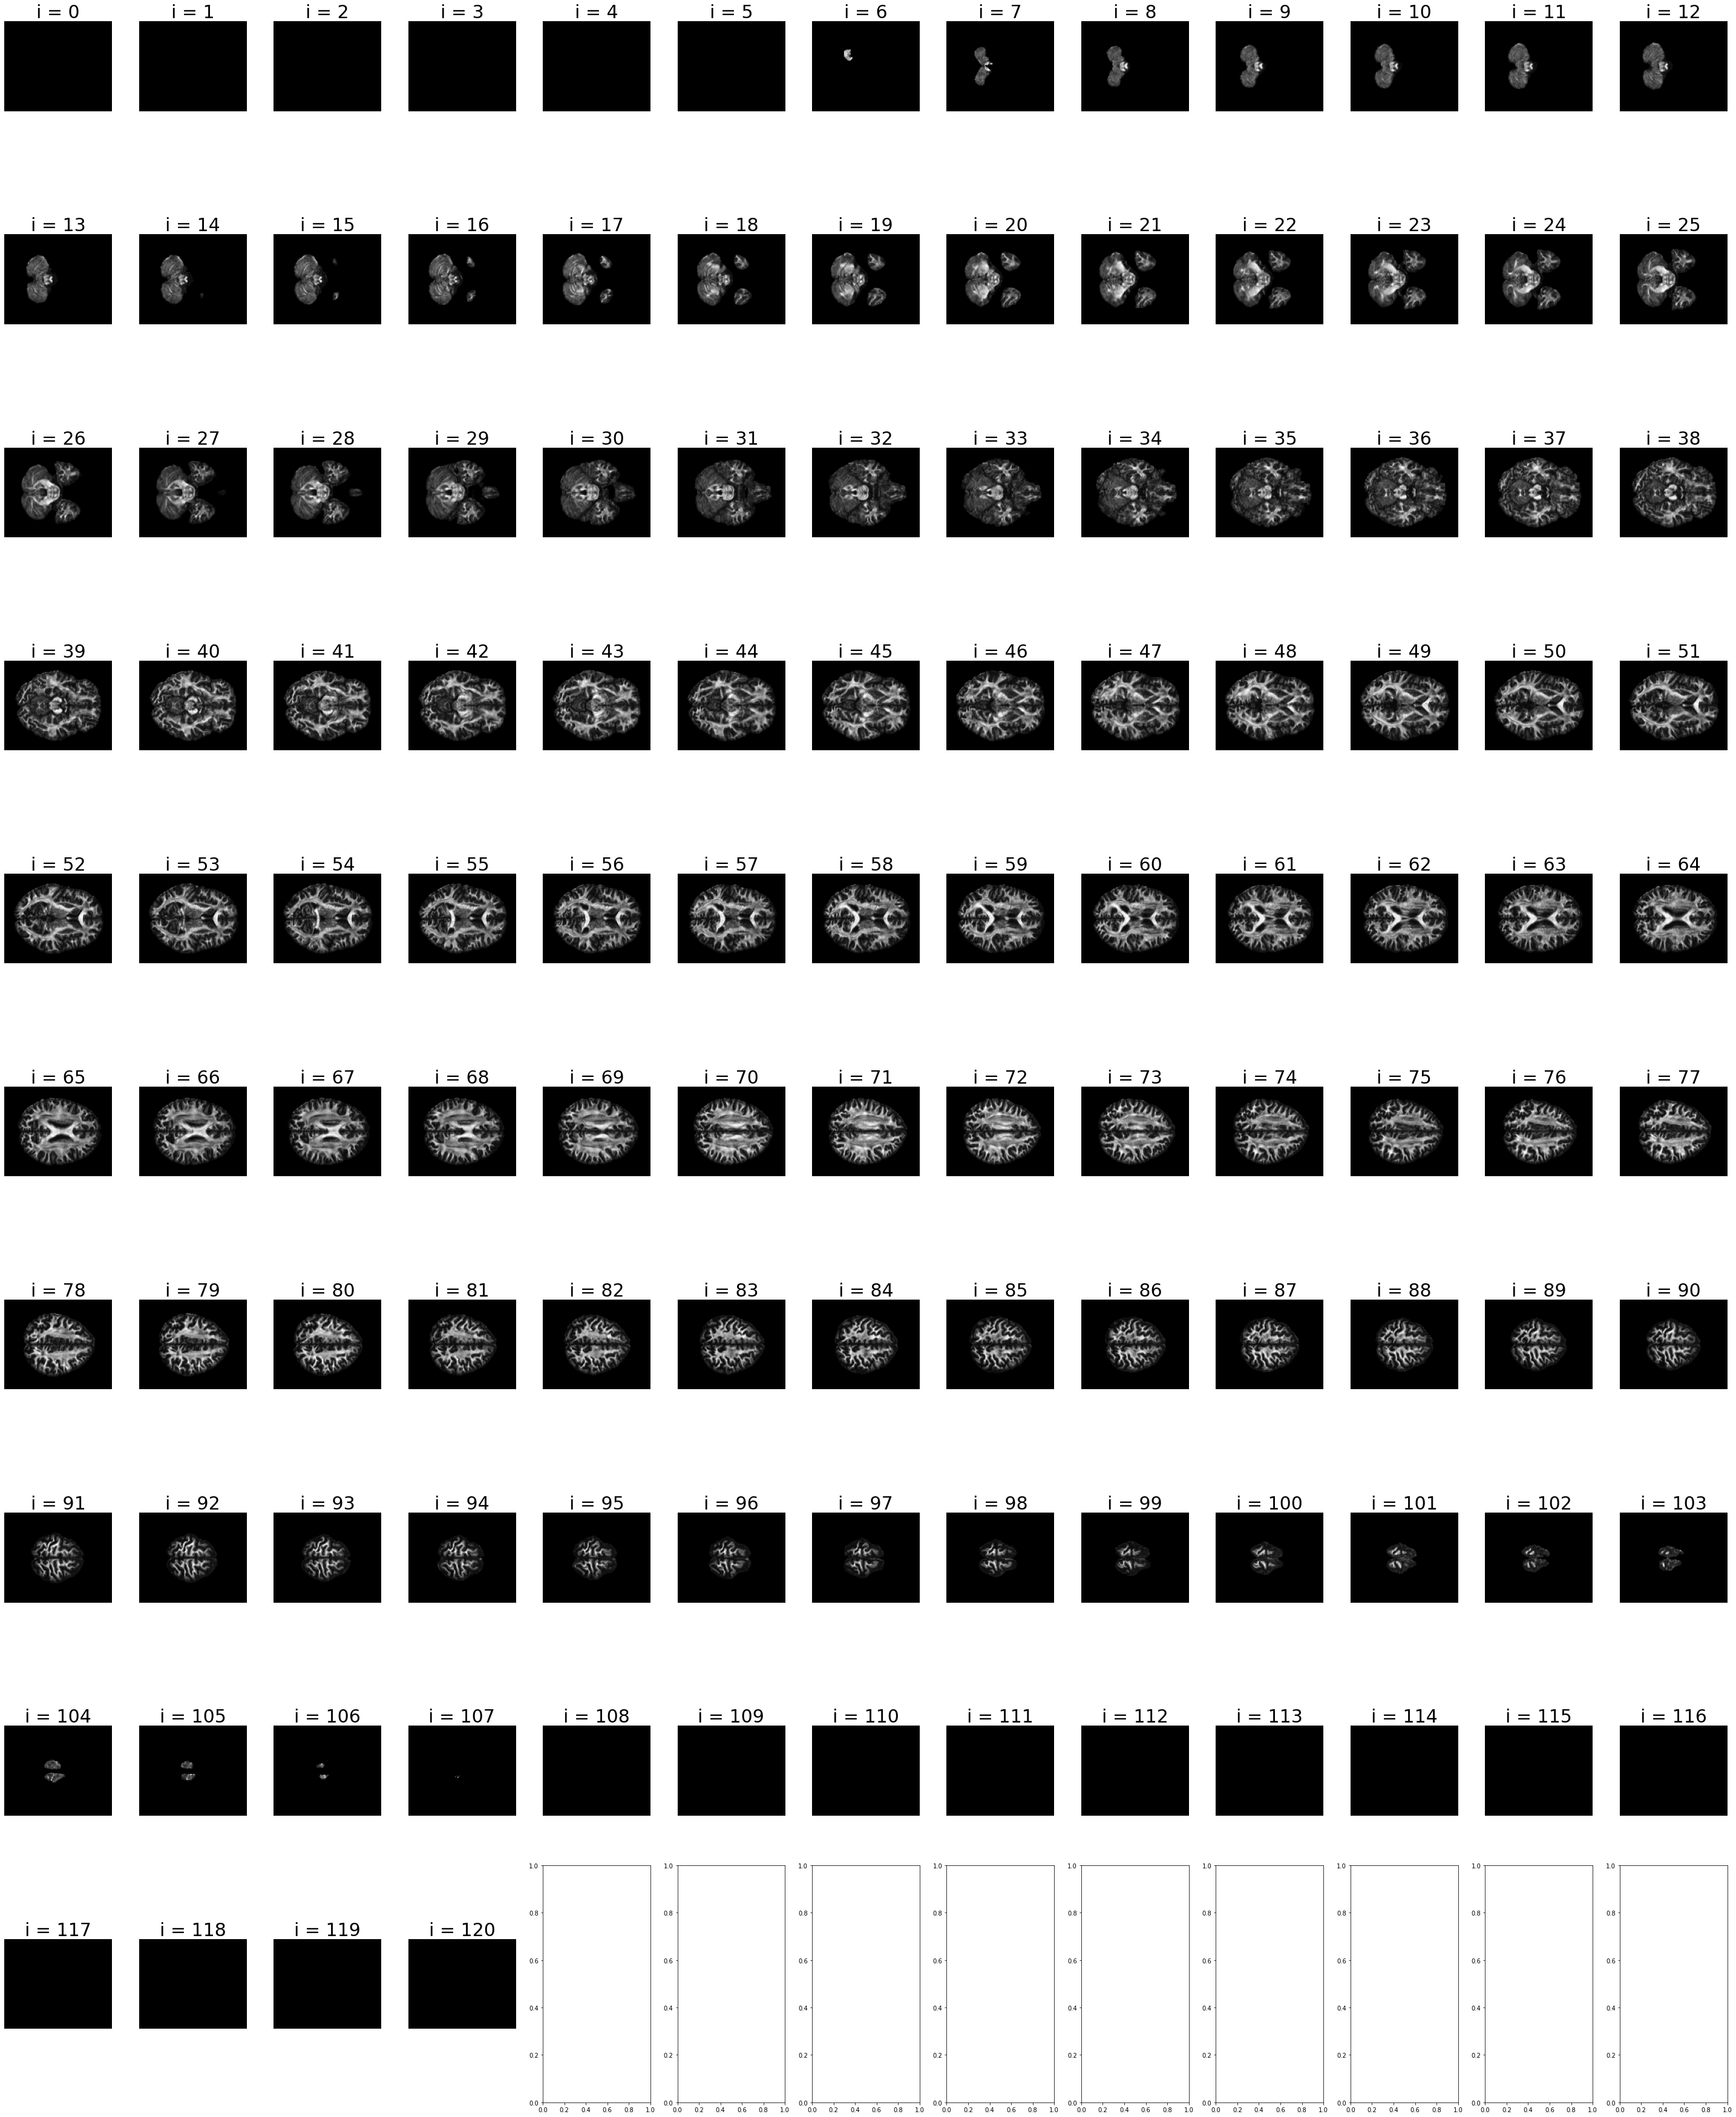

In [8]:
data = img.get_fdata()
fig, axes = plt.subplots(ncols=13, nrows=10, figsize=(40, 50)) 
for i, ax in enumerate(axes.flatten()):
    if i >= 121:
        continue
    ax.imshow(data[:, :, i], cmap='gray', origin='lower')
    ax.axis('off')
    ax.set_title('i = %i' % i, fontsize=30)
fig.tight_layout()

In [10]:
num = 10
result = f"{num + 1}"
print(result)

11


In [11]:
source = r'/root/default/capstone/fib_1mm_fa_co-regist_target(sMRI)'
save = r'/root/default/capstone/HCP_co-regist_1.5mm/40'
files = os.listdir(source)
files.sort()
count = 0
for file in files:
    print(count, end = " ")
    for i in range(40):
        plt.imsave(f"{save}/axial/{file}_{i+1}.png",data[:, :, i+37],cmap='gray', origin='lower')
        print(f"{save}/axial/{file}_{i+1}.png")
    count += 1

count = 0
for file in files:
    print(count, end = " ")
    for i in range(40):
        plt.imsave(f"{save}/coronal/{file}_{i+1}.png",data[:, i+54, :],cmap='gray', origin='lower')
        print(f"{save}/coronal/{file}_{i+1}.png")
    count += 1

count = 0
for file in files:
    print(count, end = " ")
    for i in range(40):
        plt.imsave(f"{save}/sagittal/{file}_{i+1}.png",data[i+40, :, :],cmap='gray', origin='lower')
        print(f"{save}/sagittal/{file}_{i+1}.png")
    count += 1

### Data 차원 오류 수정
2D data에 대해서 3차원으로 출력이 되는 것을 확인 --> 마지막 차원: 색  
Gray Scale이기 때문에 이는 불필요  
따라서 이 과정은 DataGenerator.py에 추가하여 진행  

In [38]:
from PIL import Image
source = r'/root/default/capstone/HCP_YA_2mm/40/axial'
files = os.listdir(source)
# print(files)
files.sort()
file = files[0]
img = Image.open(os.path.join(source, file))
img_arr = np.array(img)
img_arr2 = img_arr[0][:][:]
print(img_arr.shape)
print(img_arr2.shape)
new_img = img_arr.transpose()
new_imt2 = new_img[:][:][0]
print(new_imt2.shape)
new_img3 = new_imt2.transpose()
print(new_img3.shape)
for i in range(78):
    for j in range(94):
        if img_arr[i][j][0] != new_img3[i][j]:
            print(False)

(78, 94, 4)
(94, 4)
(94, 78)
(78, 94)
